In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load the image
image = Image.open('sample.jpg')

In [3]:
# Convert image to grayscale
image = image.convert('L')

In [4]:
# Convert the image to a NumPy array
image = np.array(image)

In [5]:
# Perform eigenvalue decomposition on the covariance matrix
eigvals, eigvecs = np.linalg.eig(np.cov(image.T))

In [6]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

In [7]:
# Keep only the dominant eigenvalues and eigenvectors
num_components = 100  # Number of components to keep
eigvals = eigvals[0:num_components]
eigvecs = eigvecs[:, 0:num_components]

In [8]:
# Reconstruct the image using the dominant eigenvectors
reconstructed_image = Image.fromarray(np.clip(np.dot(eigvecs, eigvecs.T.dot(image.T)).T, 0, 255).astype(np.uint8))

/tmp/ipykernel_7388/3649878524.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = Image.fromarray(np.clip(np.dot(eigvecs, eigvecs.T.dot(image.T)).T, 0, 255).astype(np.uint8))


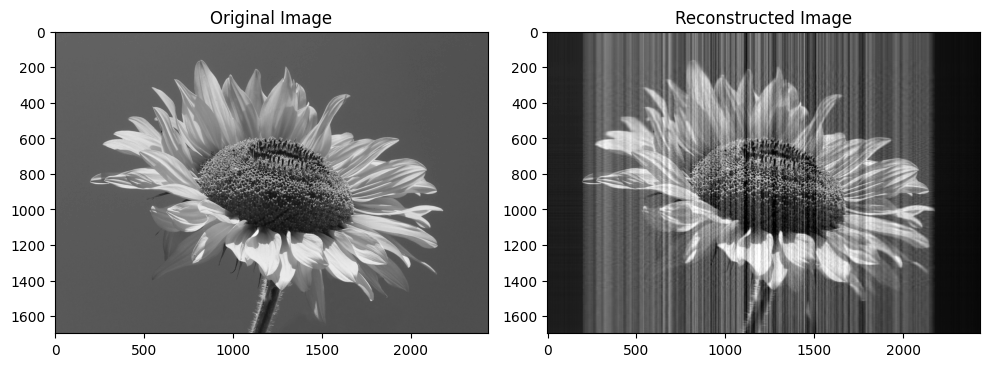

In [9]:
# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image")
plt.tight_layout()
plt.show()